In [452]:
# Import dependencies for data cleaning and graph testing

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [453]:
bird_data_df = pd.read_csv('Resources/trends-bird-populations.csv', encoding='utf-8')
national_df = pd.read_csv('Resources/1_national.csv', encoding='utf-8', nrows=14, usecols=['Status','NatureServe status code','Number of species'])
selected_df = pd.read_csv('Resources/2_selected-groups.csv', encoding='utf-8')
regional_df = pd.read_csv('Resources/3_regional.csv', encoding='utf-8')
species_df = pd.read_csv('Resources/canadian-species-index-EN.csv', encoding='utf-8')
forests_df = pd.read_csv('Resources/World Forest Cover 1990-2020.csv', encoding='latin1')

In [454]:
bird_data_df.head()

,Year,Waterfowl (percentage change from 1970),Birds of prey (percentage change from 1970),Wetland birds (percentage change from 1970),Seabirds (percentage change from 1970),Forest birds (percentage change from 1970),All other birds (percentage change from 1970),Shorebirds (percentage change from 1970),Grassland birds (percentage change from 1970),Aerial insectivores (percentage change from 1970)
0,1970,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
1,1971,1.7,0.9,3.1,NaN,0.2,0.0,NaN,-0.7,-3.3
2,1972,3.0,1.9,6.2,NaN,0.1,0.0,NaN,-1.2,-5.6
3,1973,3.9,3.5,8.7,NaN,0.1,-0.1,NaN,-2.6,-7.6
4,1974,4.8,4.9,10.3,NaN,0.6,-0.8,0.0,-4.9,-9.0


In [455]:
bird_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               47 non-null     int64  
 1   Waterfowl (percentage change from 1970)            47 non-null     float64
 2   Birds of prey (percentage change from 1970)        47 non-null     float64
 3   Wetland birds (percentage change from 1970)        47 non-null     float64
 4   Seabirds (percentage change from 1970)             33 non-null     float64
 5   Forest birds (percentage change from 1970)         47 non-null     float64
 6   All other birds (percentage change from 1970)      47 non-null     float64
 7   Shorebirds (percentage change from 1970)           43 non-null     float64
 8   Grassland birds (percentage change from 1970)      47 non-null     float64
 9   Aerial insec

In [456]:
national_df

,Status,NatureServe status code,Number of species
0,National conservation status rank,-,-
1,Presumed extirpated,NX,40
2,Possibly extirpated,NH,95
3,Critically imperiled,N1,873
4,Imperiled,N2,1245
5,Vulnerable,N3,2765
6,Apparently secure,N4,9562
7,Secure,N5,10038
8,Unrankable,NU,20448
9,Unranked,NNR,1549


In [457]:
national_df = df = national_df.replace('-', np.nan)

In [458]:
national_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status                   14 non-null     object
 1   NatureServe status code  10 non-null     object
 2   Number of species        12 non-null     object
dtypes: object(3)
memory usage: 464.0+ bytes


In [459]:
national_df['Number of species'] = national_df['Number of species'].astype('float')

In [460]:
selected_df.head(10)

,Species group,Critically imperiled (N1),Imperiled (N2),Vulnerable (N3),Apparently secure (N4),Secure (N5),Subtotal of species with numerical ranks,Presumed extirpated (NX),Possibly extirpated (NH),Unrankable (NU),Unranked (NNR),Not applicable (NNA),Total
0,Amphibians,3,5,10,9,19,46,1,0,0,0,0,47
1,Ants,0,0,5,22,113,140,0,3,47,0,15,205
2,Bees,4,11,16,67,186,284,0,0,590,5,24,903
3,Beetles,97,77,324,1841,1729,4068,0,21,3450,25,674,8238
4,Birds,23,22,52,84,255,436,5,0,18,3,234,696
5,Bivalves,12,11,12,90,53,178,1,1,219,1,16,416
6,Bryophytes,75,146,184,296,387,1088,1,4,287,2,24,1406
7,Caddisflies,0,0,2,159,64,225,0,3,406,45,0,679
8,Cephalopods,0,0,0,23,10,33,0,0,67,0,0,100
9,Corals,0,1,40,4,11,56,0,0,95,1,0,152


In [461]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Species group                             46 non-null     object
 1   Critically imperiled (N1)                 46 non-null     int64 
 2   Imperiled (N2)                            46 non-null     int64 
 3   Vulnerable (N3)                           46 non-null     int64 
 4   Apparently secure (N4)                    46 non-null     int64 
 5   Secure (N5)                               46 non-null     int64 
 6   Subtotal of species with numerical ranks  46 non-null     int64 
 7   Presumed extirpated (NX)                  46 non-null     int64 
 8   Possibly extirpated (NH)                  46 non-null     int64 
 9   Unrankable (NU)                           46 non-null     int64 
 10  Unranked (NNR)                            46 non-nul

In [462]:
regional_df.head()

,Region,Critically imperiled (S1),Imperiled (S2),Vulnerable (S3),Apparently secure (S4),Secure (S5),Subtotal of species with numerical ranks,Possibly extirpated (SX),Presumed extirpated (SH),Unrankable (SU),Unranked (SNR),Not applicable (SNA),Total,Number of species found only in this region
0,Ontario,664,742,1367,6639,2378,11790,119,37,11182,14,2634,25776,3920
1,British Columbia,249,648,2198,4702,3171,10968,43,10,8803,2545,2170,24539,6780
2,Quebec,653,777,2236,4231,3548,11445,134,20,3552,4548,2234,21933,1263
3,Alberta,560,747,2714,3702,1386,9109,11,5,7440,3,955,17523,885
4,Manitoba,387,550,1935,2365,950,6187,24,12,7954,431,914,15522,665


In [463]:
regional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Region                                       18 non-null     object
 1   Critically imperiled (S1)                    18 non-null     int64 
 2   Imperiled (S2)                               18 non-null     int64 
 3   Vulnerable (S3)                              18 non-null     int64 
 4   Apparently secure (S4)                       18 non-null     int64 
 5   Secure (S5)                                  18 non-null     int64 
 6   Subtotal of species with numerical ranks     18 non-null     int64 
 7   Possibly extirpated (SX)                     18 non-null     int64 
 8   Presumed extirpated (SH)                     18 non-null     int64 
 9   Unrankable (SU)                              18 non-null     int64 
 10  Unranked (SNR)  

In [464]:
species_df.head()

,Year,National index (percent change),Number of species,Bird index (percent change),Number of bird species,Mammal index (percent change),Number of mammal species,Fish index (percent change),Number of fish species
0,1970,0.00,405,0.00,296,0.00,24,0.00,85
1,1971,0.89,424,0.56,305,-10.71,29,5.62,90
2,1972,1.55,426,1.20,309,-18.74,30,9.85,82
3,1973,1.82,442,1.90,312,-25.26,34,12.10,96
4,1974,1.55,474,2.64,335,-34.37,32,13.51,107


In [465]:
species_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             47 non-null     int64  
 1   National index (percent change)  47 non-null     float64
 2   Number of species                47 non-null     int64  
 3   Bird index (percent change)      47 non-null     float64
 4   Number of bird species           47 non-null     int64  
 5   Mammal index (percent change)    47 non-null     float64
 6   Number of mammal species         47 non-null     int64  
 7   Fish index (percent change)      47 non-null     float64
 8   Number of fish species           47 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 3.4 KB


In [466]:
forests_df.head()

,Country,1990 Total,1990 Percent,2000 Total,2000 Percent,2010 Total,2010 Percent,2020 Total,2020 Percent
0,Afghanistan,1208,1.85,1208,1.85,1208,1.85,1208,1.85
1,Albania,789,28.80,769,28.07,782,28.54,789,28.80
2,Algeria,1667,0.70,1579,0.66,1918,0.81,1949,0.82
3,American Samoa,18,90.45,18,90.45,17,85.43,17,85.43
4,Andorra,16,34.19,16,34.19,16,34.19,16,34.19


In [467]:
forests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       215 non-null    object 
 1   1990 Total    215 non-null    int64  
 2   1990 Percent  215 non-null    float64
 3   2000 Total    215 non-null    int64  
 4   2000 Percent  215 non-null    float64
 5   2010 Total    215 non-null    int64  
 6   2010 Percent  215 non-null    float64
 7   2020 Total    215 non-null    int64  
 8   2020 Percent  215 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 15.2+ KB


In [468]:
species_df_percent = species_df[['Year', 'National index (percent change)',
       'Bird index (percent change)',
       'Mammal index (percent change)',
       'Fish index (percent change)']]

In [469]:
forests_df.to_csv('Resources/forests.csv', encoding='utf-8', index=False)

In [470]:
bird_data_df.to_csv('Resources/birds.csv', encoding='utf-8', index=False)
national_df.to_csv('Resources/national.csv', encoding='utf-8', index=False)
selected_df.to_csv('Resources/selected.csv', encoding='utf-8', index=False)
regional_df.to_csv('Resources/regional.csv', encoding='utf-8', index=False)
species_df.to_csv('Resources/species.csv', encoding='utf-8', index=False)
species_df_percent.to_csv('Resources/species_percent.csv', encoding='utf-8', index=False)


In [471]:
bird_data_df.to_json('Resources/birds.json')
national_df.to_json('Resources/national.json')
selected_df.to_json('Resources/selected.json')
regional_df.to_json('Resources/regional.json')
species_df.to_json('Resources/species.json')
species_df_percent.to_json('Resources/species_percent.json')

In [472]:
bird_data_df.columns

Index(['Year', 'Waterfowl (percentage change from 1970)',
       'Birds of prey (percentage change from 1970)',
       'Wetland birds (percentage change from 1970)',
       'Seabirds (percentage change from 1970)',
       'Forest birds (percentage change from 1970)',
       'All other birds (percentage change from 1970)',
       'Shorebirds (percentage change from 1970)',
       'Grassland birds (percentage change from 1970)',
       'Aerial insectivores (percentage change from 1970)'],
      dtype='object')

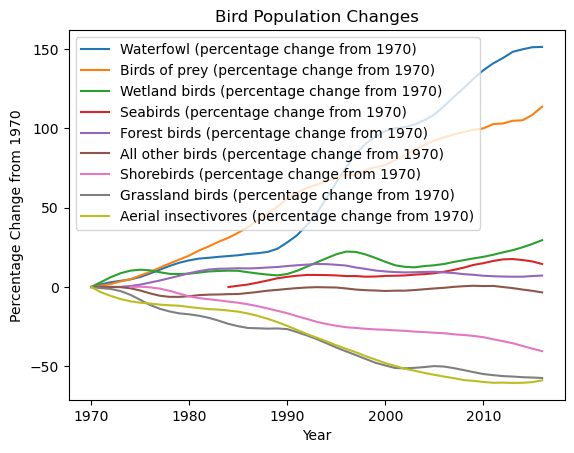

In [473]:

# Set the 'Year' column as the index
bird_data_df.set_index('Year', inplace=True)

# Plot the data using pandas plot function
bird_data_df.plot(kind='line')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Change from 1970')
plt.title('Bird Population Changes')

# Show the line chart
plt.show()

In [474]:
national_df.columns

Index(['Status', 'NatureServe status code', 'Number of species'], dtype='object')

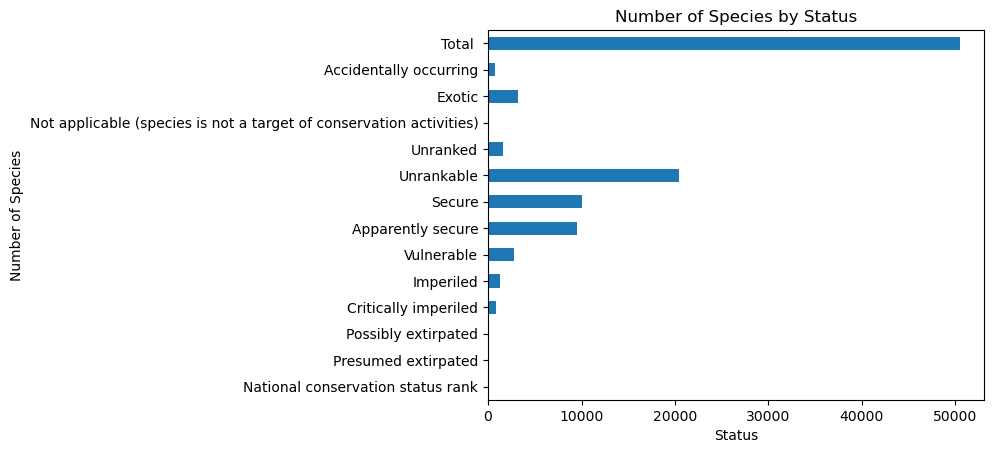

In [475]:
# Set 'Status' column as the index
national_df.set_index('Status', inplace=True)

# Create the bar chart using pandas plot function
national_df.plot(kind='barh', y='Number of species', legend=False)

# Set labels and title
plt.xlabel('Status')
plt.ylabel('Number of Species')
plt.title('Number of Species by Status')

# Show the bar chart
plt.show()

In [476]:
selected_df

,Species group,Critically imperiled (N1),Imperiled (N2),Vulnerable (N3),Apparently secure (N4),Secure (N5),Subtotal of species with numerical ranks,Presumed extirpated (NX),Possibly extirpated (NH),Unrankable (NU),Unranked (NNR),Not applicable (NNA),Total
0,Amphibians,3,5,10,9,19,46,1,0,0,0,0,47
1,Ants,0,0,5,22,113,140,0,3,47,0,15,205
2,Bees,4,11,16,67,186,284,0,0,590,5,24,903
3,Beetles,97,77,324,1841,1729,4068,0,21,3450,25,674,8238
4,Birds,23,22,52,84,255,436,5,0,18,3,234,696
5,Bivalves,12,11,12,90,53,178,1,1,219,1,16,416
6,Bryophytes,75,146,184,296,387,1088,1,4,287,2,24,1406
7,Caddisflies,0,0,2,159,64,225,0,3,406,45,0,679
8,Cephalopods,0,0,0,23,10,33,0,0,67,0,0,100
9,Corals,0,1,40,4,11,56,0,0,95,1,0,152


In [477]:
regional_df

,Region,Critically imperiled (S1),Imperiled (S2),Vulnerable (S3),Apparently secure (S4),Secure (S5),Subtotal of species with numerical ranks,Possibly extirpated (SX),Presumed extirpated (SH),Unrankable (SU),Unranked (SNR),Not applicable (SNA),Total,Number of species found only in this region
0,Ontario,664,742,1367,6639,2378,11790,119,37,11182,14,2634,25776,3920
1,British Columbia,249,648,2198,4702,3171,10968,43,10,8803,2545,2170,24539,6780
2,Quebec,653,777,2236,4231,3548,11445,134,20,3552,4548,2234,21933,1263
3,Alberta,560,747,2714,3702,1386,9109,11,5,7440,3,955,17523,885
4,Manitoba,387,550,1935,2365,950,6187,24,12,7954,431,914,15522,665
5,Nova Scotia,376,294,489,1011,1588,3758,20,9,7858,177,1782,13604,508
6,New Brunswick,395,270,691,1800,1709,4865,26,13,6760,193,1605,13462,337
7,Saskatchewan,392,366,1317,2632,851,5558,38,8,5984,11,912,12511,278
8,Newfoundland,175,400,564,833,532,2504,19,1,1572,3536,1114,8746,297
9,Yukon,124,302,705,1661,881,3673,98,1,3226,602,280,7880,335


In [478]:
species_df_percent

,Year,National index (percent change),Bird index (percent change),Mammal index (percent change),Fish index (percent change)
0,1970,0.00,0.00,0.00,0.00
1,1971,0.89,0.56,-10.71,5.62
2,1972,1.55,1.20,-18.74,9.85
3,1973,1.82,1.90,-25.26,12.10
4,1974,1.55,2.64,-34.37,13.51
5,1975,1.51,3.42,-39.60,13.74
6,1976,1.48,4.22,-41.62,12.42
7,1977,1.65,5.09,-41.70,11.36
8,1978,2.27,5.93,-38.67,10.28
9,1979,2.95,6.67,-35.94,9.92


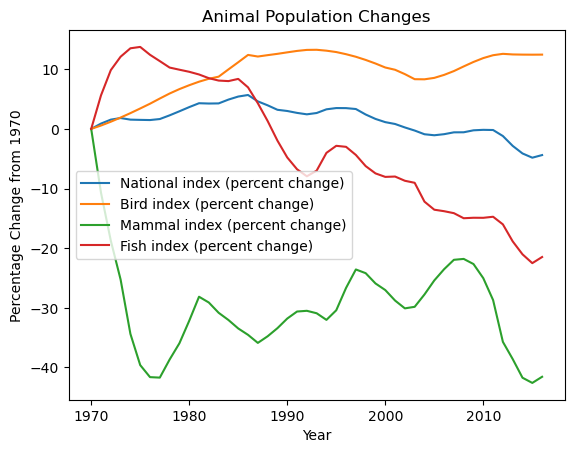

In [479]:
species_df_percent.set_index('Year', inplace=True)

# Plot the data using pandas plot function
species_df_percent.plot(kind='line')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Change from 1970')
plt.title('Animal Population Changes')

# Show the line chart
plt.show()

In [480]:
forests_df

,Country,1990 Total,1990 Percent,2000 Total,2000 Percent,2010 Total,2010 Percent,2020 Total,2020 Percent
0,Afghanistan,1208,1.85,1208,1.85,1208,1.85,1208,1.85
1,Albania,789,28.80,769,28.07,782,28.54,789,28.80
2,Algeria,1667,0.70,1579,0.66,1918,0.81,1949,0.82
3,American Samoa,18,90.45,18,90.45,17,85.43,17,85.43
4,Andorra,16,34.19,16,34.19,16,34.19,16,34.19
...,...,...,...,...,...,...,...,...,...
210,Wallis and Futuna Islands,6,42.25,6,42.25,6,42.25,6,42.25
211,Western Sahara,665,2.50,669,2.52,665,2.50,665,2.50
212,Yemen,549,0.99,549,0.99,549,0.99,549,0.99
213,Zambia,47412,63.78,47054,63.30,46696,62.81,44814,60.28


In [481]:
forests_df.columns

Index(['Country', '1990 Total', '1990 Percent', '2000 Total', '2000 Percent',
       '2010 Total', '2010 Percent', '2020 Total', '2020 Percent'],
      dtype='object')

In [483]:
forests_df_percent = forests_df[['Country', '1990 Percent', '2000 Percent', '2010 Percent', '2020 Percent']]
forests_df_percent

,Country,1990 Percent,2000 Percent,2010 Percent,2020 Percent
0,Afghanistan,1.85,1.85,1.85,1.85
1,Albania,28.80,28.07,28.54,28.80
2,Algeria,0.70,0.66,0.81,0.82
3,American Samoa,90.45,90.45,85.43,85.43
4,Andorra,34.19,34.19,34.19,34.19
...,...,...,...,...,...
210,Wallis and Futuna Islands,42.25,42.25,42.25,42.25
211,Western Sahara,2.50,2.52,2.50,2.50
212,Yemen,0.99,0.99,0.99,0.99
213,Zambia,63.78,63.30,62.81,60.28


In [488]:
forests_df_percent['Average'] = forests_df_percent.mean(axis=1)

# Optional: Round the average values to a specific number of decimal places
forests_df_percent['Average'] = forests_df_percent['Average'].round(2)

# Display the updated DataFrame
forests_df_percent

C:\Users\krist\AppData\Local\Temp\ipykernel_1004\761493144.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  forests_df_percent['Average'] = forests_df_percent.mean(axis=1)
C:\Users\krist\AppData\Local\Temp\ipykernel_1004\761493144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forests_df_percent['Average'] = forests_df_percent.mean(axis=1)
C:\Users\krist\AppData\Local\Temp\ipykernel_1004\761493144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Country,1990 Percent,2000 Percent,2010 Percent,2020 Percent,Average
0,Afghanistan,1.85,1.85,1.85,1.85,1.85
1,Albania,28.80,28.07,28.54,28.80,28.55
2,Algeria,0.70,0.66,0.81,0.82,0.75
3,American Samoa,90.45,90.45,85.43,85.43,87.94
4,Andorra,34.19,34.19,34.19,34.19,34.19
...,...,...,...,...,...,...
210,Wallis and Futuna Islands,42.25,42.25,42.25,42.25,42.25
211,Western Sahara,2.50,2.52,2.50,2.50,2.50
212,Yemen,0.99,0.99,0.99,0.99,0.99
213,Zambia,63.78,63.30,62.81,60.28,62.54
